In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [134]:
customers=pd.read_csv("customers.csv")
product=pd.read_csv("products.csv")
transaction=pd.read_csv("transactions.csv")

# Nettoyage des données 

## Clients

 #### Cette table recence le sexe, la date de naissance 

In [135]:
customers.head(10)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
5,c_415,m,1993
6,c_285,f,1967
7,c_160,f,1978
8,c_6446,m,1971
9,c_6866,m,1993


#### Verification doublons

In [136]:
def doublons(df): # Nombre de doublons dans la dataframe
    print(len(df) - len(df.drop_duplicates()), 'doublons')

In [137]:
doublons(customers)

0 doublons


#### Unicité de clé primaire

In [138]:
customers["client_id"].is_unique

True

#### Les variables ne contiennent aucune valeur manquante ou aberrante

In [139]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


#### La seul variable quantitative de la tables des clients , les années de naissance s'étalent de 1929 à 2004

In [140]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


## Produit

#### La table produit détaille l'identifiant, le prix et la catégorie

In [141]:
product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


#### Verification de la presence de doublons et de l'unicité de la clé primaire

In [142]:
doublons(product)

0 doublons


In [143]:
product["id_prod"].is_unique

True

In [144]:
product.info() #Valeurs manquantes type de variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


#### La variable 'price' compte des prix de -1 à 300. Il faudra nettoyer les valeurs aberrantes après avoir joint les 3 tables.

In [145]:
product.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


## Transaction

#### La table des transactions détaille la date et les identifiants de la session, du client et du produit vendu.

In [146]:
transaction.head(10)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847


In [147]:
doublons(transaction) #nombre de doublons
transaction=transaction.drop_duplicates()

126 doublons


In [148]:
# Clé de 'id_prod' uniquement présente dans transactions
transaction.drop(transaction[transaction['id_prod'].isin(product['id_prod'])].index) 

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [149]:
def cle_primaire(df_cle): # Vérification de la clé primaire
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')

#### La clé de transaction est composée de l'identifiant du client et la date : Deux transcations peuvent survenir au meme moment

In [150]:
cle_primaire(transaction[["client_id","date"]])

Clé primaire (0 doublon)


In [151]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679406 non-null  object
 1   date        679406 non-null  object
 2   session_id  679406 non-null  object
 3   client_id   679406 non-null  object
dtypes: object(4)
memory usage: 42.0+ MB


## Jointure

#### On effectue la jointure de transactions successivement sur clients et produits, en ne conservant que les clés de transactions (les clients inactifs et les produits invendus sont écartés).

In [152]:
df1=transaction.merge(customers,how='left',on='client_id').merge(product,how='left', on='id_prod')
df1.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0


In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679405
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679406 non-null  object 
 1   date        679406 non-null  object 
 2   session_id  679406 non-null  object 
 3   client_id   679406 non-null  object 
 4   sex         679406 non-null  object 
 5   birth       679406 non-null  int64  
 6   price       679185 non-null  float64
 7   categ       679185 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 46.7+ MB


In [154]:
#affichage des dates avec 'test'
test=df1[(df1['date'].str.contains("test"))] 
test

,id_prod,date,session_id,client_id,sex,birth,price,categ
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,f,2001,-1.0,0.0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,f,2001,-1.0,0.0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,m,2001,-1.0,0.0
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,f,2001,-1.0,0.0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,f,2001,-1.0,0.0
...,...,...,...,...,...,...,...,...
577222,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0,f,2001,-1.0,0.0
592959,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1,m,2001,-1.0,0.0
607783,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0,f,2001,-1.0,0.0
625936,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0,f,2001,-1.0,0.0


#### En supprimant ces 74 lignes de tests, on débarasse la table de ses valeurs aberrantes (-1), du préfixe test_ dans les dates

In [155]:
#enleve les ligne qui contiennent test
df_without_test=df1.drop(test.index)

#coversion de la date en datatime 
df_without_test['date']=pd.to_datetime(df_without_test['date'])
print('Transactions du', str(df_without_test['date'].min())[:10], 'au', str(df_without_test['date'].max())[:10])

Transactions du 2021-03-01 au 2023-02-28


In [156]:
df_without_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679405
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 46.6+ MB


#### le produit 0_2245 ne figure pas dans la table produit alors qu'il est present sur transaction 

In [157]:
produit_2245 = df_without_test[df_without_test['id_prod']=='0_2245'] # Échantillon du produit 0_2245
produit_2245

,id_prod,date,session_id,client_id,sex,birth,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,NaN,NaN
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,NaN,NaN
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,NaN,NaN
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,NaN,NaN
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,NaN,NaN
...,...,...,...,...,...,...,...,...
669606,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,NaN,NaN
670558,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,NaN,NaN
671162,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,NaN,NaN
675554,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,NaN,NaN


In [158]:
df_without_test.groupby('categ').mean()['price']

categ
0.0    10.638188
1.0    20.485730
2.0    76.207412
Name: price, dtype: float64

In [159]:
#identification classe modal
mode=df_without_test['categ'].mode()[0]
mode

0.0

In [160]:
#remplace les categorie nulle par la classe modale (0.0)
df_without_test['categ']=df_without_test['categ'].fillna(mode)
df_without_test['price']=df_without_test['price'].fillna(10.63)
#df_without_test[df_without_test['id_prod']=='0_2245']

### les prix de la catégorie 2.0 sont plus cher 

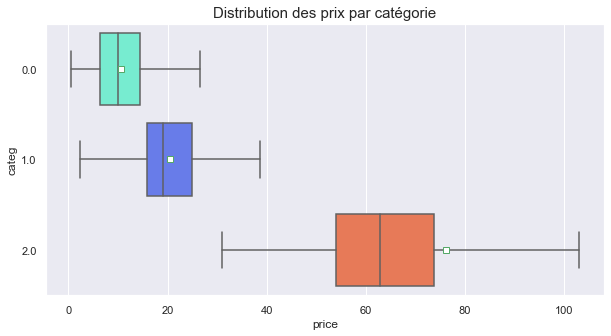

In [161]:
# Distribution et moyenne des prix par catégorie
plt.figure(figsize=(10,5))
sns.boxplot(data=df_without_test, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=["#64ffda", "#536dfe", "#ff6e40"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie',fontsize=15)
plt.show()

 

# Différents indicateurs et graphiques autour du chiffre d'affaires. 

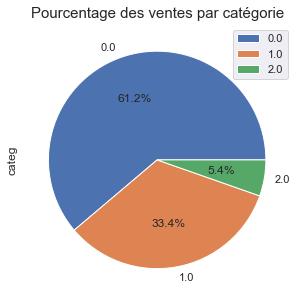

In [162]:
# pourcentage ventes par catégorie
plt.figure(figsize=(10,5))
df_without_test['categ'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Pourcentage des ventes par catégorie',fontsize=15)
plt.show()

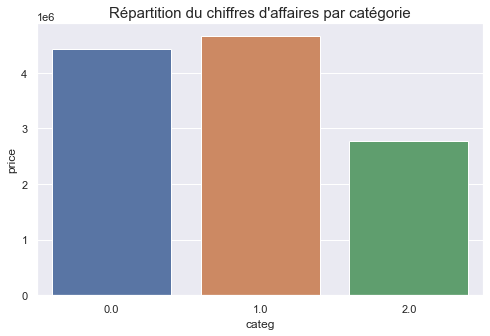

In [163]:
# Chiffre d'affaires par catégorie
plt.figure(figsize=(8,5))
data=df_without_test.pivot_table(index='categ', aggfunc={'price': np.sum}).reset_index()
sns.barplot(data=data,x="categ",y="price")
plt.title('Répartition du chiffres d\'affaires par catégorie',fontsize=15)
plt.show()

In [164]:
#calcul chiffre d'affaires par mois
df_chiff_aff=df_without_test.groupby([df_without_test['date'].dt.month.rename('MONTH'),df_without_test['date'].dt.year.rename('YEAR'),df_without_test["categ"]])['price'].sum().reset_index()

#creation colonne date en affichant année , moi et jour 
df_chiff_aff["date"]=pd.to_datetime(df_chiff_aff[['YEAR', 'MONTH']].assign(DAY=1))

# ordonner les mois                                                                      
df_chiff_aff=df_chiff_aff.sort_values(by='date')
#df_chiff_aff.index=df_chiff_aff.date

#df_chiff_aff






Text(0.5, 1.0, "Evolution du chiffre d'affaires par catégorie")

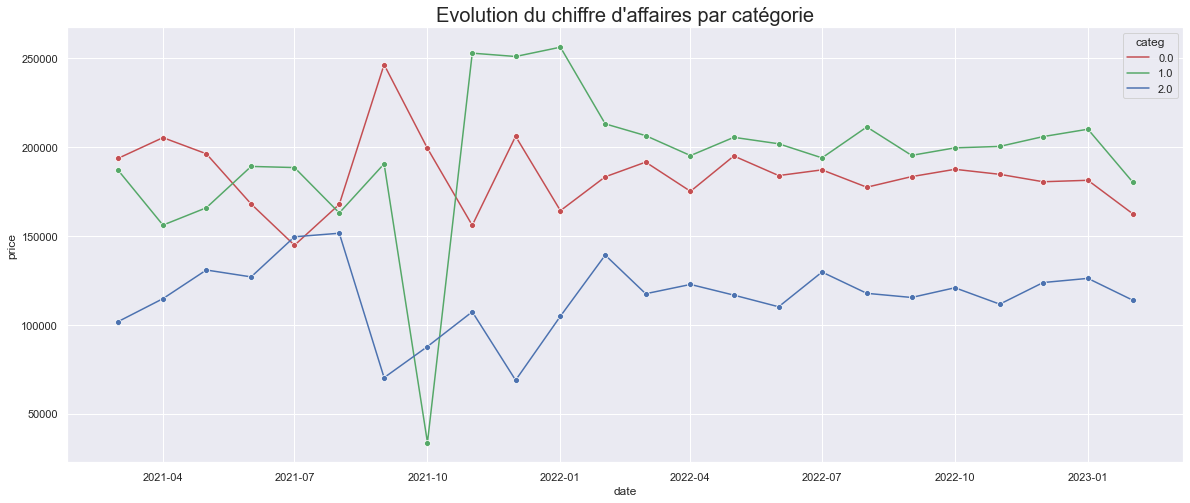

In [165]:
#evolution du chiffre d'affaire par categorie 
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
sns.lineplot(x="date",y="price",hue="categ", data = df_chiff_aff, marker = 'o',palette=['r', 'g','b'])
plt.title("Evolution du chiffre d'affaires par catégorie",fontsize=20)



Text(0.5, 1.0, "Evolution du chiffre d'affaires mensuel")

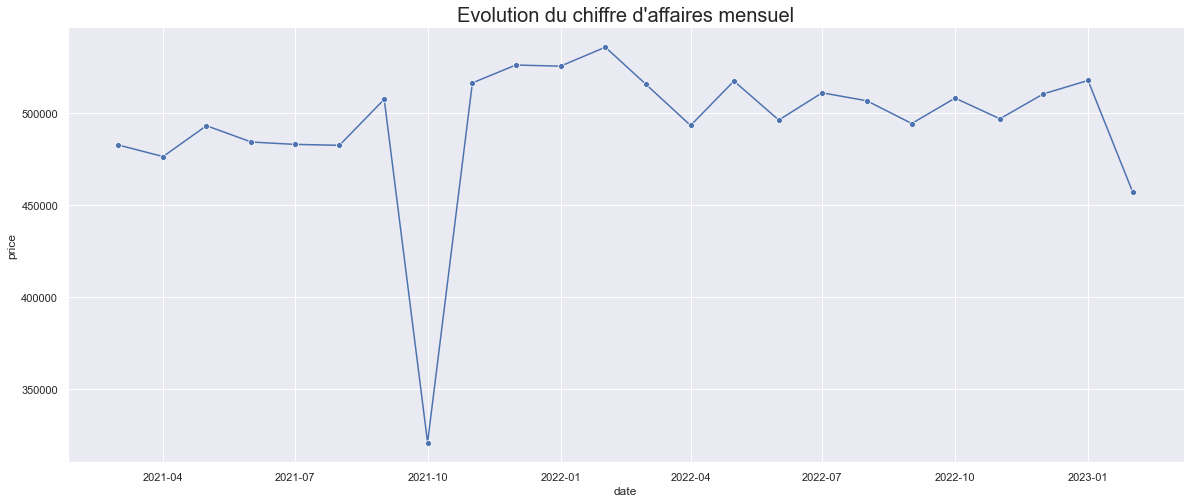

In [166]:
#calcul chiffre d'affaires par mois
df_chiff_aff.index=df_chiff_aff.date
df_chiff_mens=df_chiff_aff.groupby([df_chiff_aff["date"]])['price'].sum().reset_index()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
sns.lineplot(x="date",y="price", data = df_chiff_mens, marker = 'o')
plt.title("Evolution du chiffre d'affaires mensuel",fontsize=20)


# Décomposition en moyenne mobile 

Text(0.5, 1.0, 'Moyenne mobile trimestrielle')

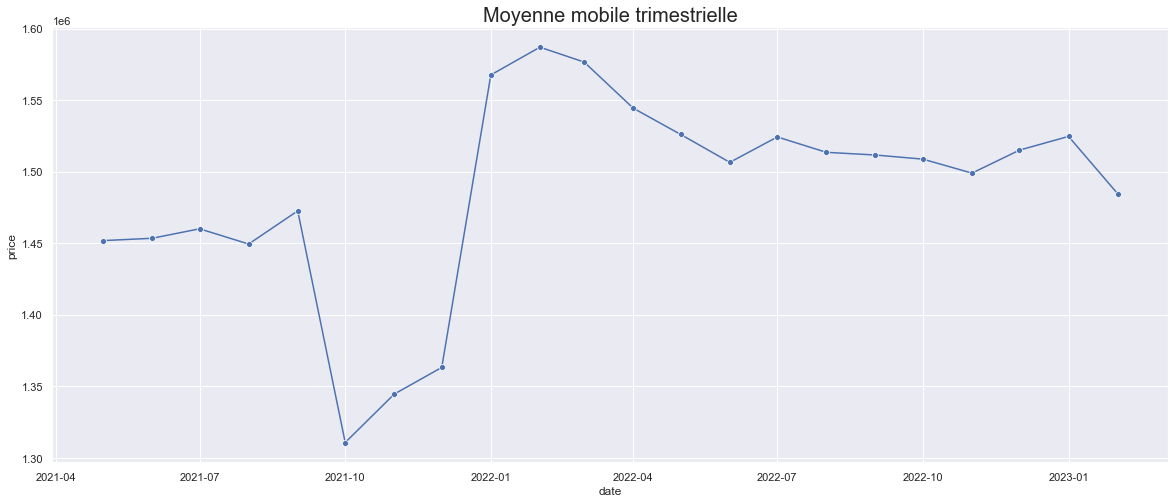

In [167]:
df_chiff_mens.index=df_chiff_mens.date
#moyenne mobile par trimestre (n=3)
plt.figure(figsize=(20,8))
test=pd.DataFrame(df_chiff_mens['price'].rolling(3).sum()).reset_index()
sns.lineplot(x="date",y="price", data =test, marker = 'o')
plt.title("Moyenne mobile trimestrielle",fontsize=20)
#test

# zoom sur les références

#### Les tops produits

In [168]:
prod_des=df_without_test.pivot_table(index=['id_prod',"categ"], aggfunc={"price":'count'}).sort_values(
      by="price",ascending=False).reset_index().rename(columns={'price': 'Nombre de transcation'})

prod_des.head(10)



,id_prod,categ,Nombre de transcation
0,1_369,1.0,2252
1,1_417,1.0,2189
2,1_414,1.0,2180
3,1_498,1.0,2128
4,1_425,1.0,2096
5,1_403,1.0,1960
6,1_412,1.0,1951
7,1_413,1.0,1945
8,1_406,1.0,1939
9,1_407,1.0,1935


#### Les flops produits

In [169]:
 prod_des.tail(10)

,id_prod,categ,Nombre de transcation
3256,0_2201,0.0,1
3257,0_1151,0.0,1
3258,0_1728,0.0,1
3259,2_81,2.0,1
3260,0_1539,0.0,1
3261,0_1284,0.0,1
3262,0_549,0.0,1
3263,0_1498,0.0,1
3264,0_541,0.0,1
3265,0_886,0.0,1


## La repartition des tops/flops par catégories

In [170]:
for idx, x in df_without_test.groupby([df_without_test['categ']]):
  print(idx)
  prod_des=x.pivot_table(index=['id_prod',"categ"], aggfunc={"price":'count'}).sort_values(
  by="price",ascending=False).reset_index().rename(columns={'price': 'Nombre de transcation'})
    
  print("les tops produit de la categorie "+str(idx))
  print(prod_des.head(10))
  print("les flops de la categorie "+str(idx))
  print(prod_des.tail(10))
    
  print(50*'-' )
  
    
    

0.0
les tops produit de la categorie 0.0
  id_prod  categ  Nombre de transcation
0  0_1422    0.0                   1292
1  0_1431    0.0                   1282
2  0_1425    0.0                   1266
3  0_1432    0.0                   1254
4  0_1411    0.0                   1246
5  0_1428    0.0                   1245
6     0_0    0.0                   1242
7  0_1424    0.0                   1238
8  0_1434    0.0                   1235
9  0_1441    0.0                   1235
les flops de la categorie 0.0
     id_prod  categ  Nombre de transcation
2283   0_541    0.0                      1
2284   0_833    0.0                      1
2285  0_2201    0.0                      1
2286  0_1379    0.0                      1
2287   0_807    0.0                      1
2288   0_549    0.0                      1
2289  0_1683    0.0                      1
2290  0_1284    0.0                      1
2291  0_1498    0.0                      1
2292  0_1151    0.0                      1
----------------

# Profils des clients

In [171]:
from datetime import datetime
year = datetime.now().year # Année courante
df_without_test=df_without_test.reset_index(drop=True)
df_without_test['age'] = year - df_without_test['birth'] # Âge du client

# Tranches d'âge
df_without_test['classe_age'] = '18-30'
df_without_test['classe_age'].loc[df_without_test[df_without_test['age']>=30].index] = '30-40'
df_without_test['classe_age'].loc[df_without_test[df_without_test['age']>=40].index] = '40-50'
df_without_test['classe_age'].loc[df_without_test[df_without_test['age']>=50].index] = '50-60'
df_without_test['classe_age'].loc[df_without_test[df_without_test['age']>=60].index] = '60-70'
df_without_test['classe_age'].loc[df_without_test[df_without_test['age']>=70].index] = '70-80'
df_without_test['classe_age'].loc[df_without_test[df_without_test['age']>=80].index] = '80 et +'



### La pyramide des âges ne montre aucune différence entre les hommes et les femmes.

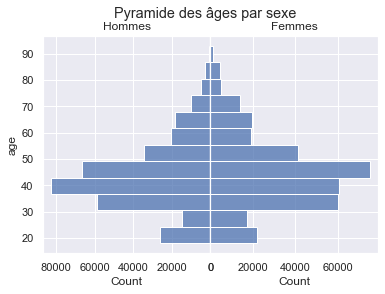

In [172]:

fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe')
sns.histplot(ax=axes[0], y=df_without_test[df_without_test['sex']=='m']['age'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=df_without_test[df_without_test['sex']=='f']['age'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

 ### Les 30-50 ans représentent plus de la moitié des ventes.

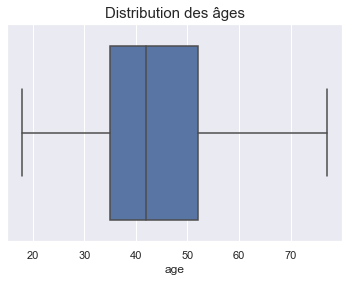

In [173]:
sns.boxplot(data=df_without_test, x='age', showfliers=False)
plt.title('Distribution des âges',fontsize=15)
plt.show()

<Figure size 864x720 with 0 Axes>

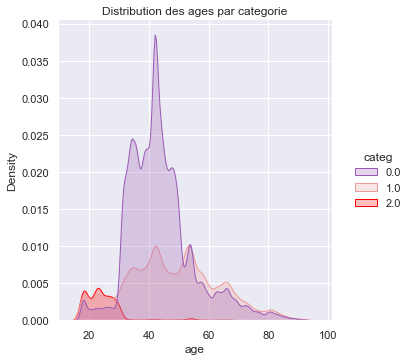

In [174]:
#Distribution des ages par categorie
plt.figure(figsize=(12,10))
sns.displot(data=df_without_test, x='age', hue='categ', kind='kde', fill=True,palette=["#9b59b6","#EF9A9A", "#ff0000"])
plt.title("Distribution des ages par categorie")
plt.show()



In [175]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1.05])
    plt.ylim([0,1.05])
    plt.title(title)
    plt.show()
     
    

#### L'indice de Gini mesure ici l'inégalité des chiffres d'affaires de tous les clients.

#### Indice de Gini : chiffre de 0 à 1 mesurant l'aire entre la bissectrice et la courbe de Lorenz

#### * un coefficient de 0 indiquerait une égalité parfaite 
#### * si l'indice était de 1, un seul client détiendrait la totalité du chiffre d'affaires 
#### * d'apres le calcul de l'indice de gini 44% client detiennent  environ 20% du chiffre d'affaires 


Incide de Gini : 0.4463955148291978


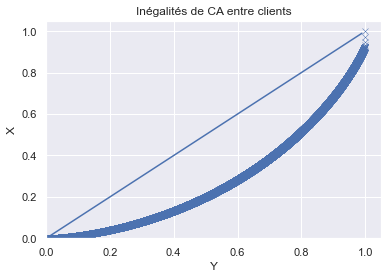

In [176]:
lorenz(df_without_test.pivot_table(index='client_id', aggfunc='sum')['price'], 'Inégalités de CA entre clients')


# Le lien entre les variables

#### 1/ le lien entre l’âge des clients et le montant total des achats (quantitative)

#### on observe certaines tendances comme les  30-50 ans et les moins de 30 ans font plus d'achats 

In [177]:
df_achat=df_without_test.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'total_achats'})
df_achat=df_achat.merge(df_without_test[["client_id","classe_age","age"]].drop_duplicates(),on="client_id",how='left')
#df_achat.head()

Text(0.5, 1.0, "Distribution total achat par classe d'age")

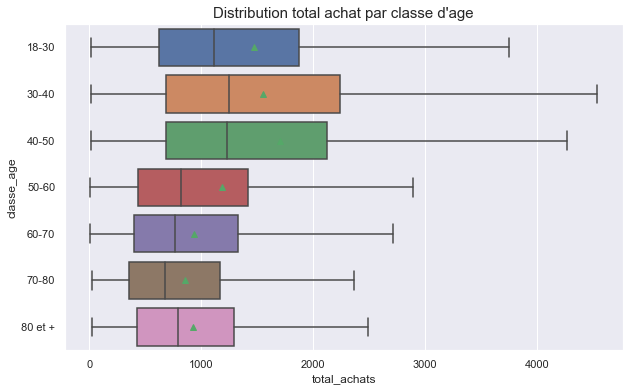

In [178]:
#distribution du chiffre d'affaire par classe d'age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_achat.sort_values(by='classe_age'), 
            y='classe_age', x='total_achats', 
            showfliers=False, showmeans=True)
plt.title("Distribution total achat par classe d'age",fontsize=15)

#### H1 validé :  corrélation entre l'age et le total d'achat car (0,0002 ) inferieur à 0,05 


In [179]:
from scipy import stats
r,p=stats.pearsonr(df_achat["age"], df_achat["total_achats"])
print('p-value = ' ,p)
if p > .05:
    print('H0: Les variables sont indépendantes')
else:
    print('H1: Il y\'a une dépendance entre les variables')

p-value =  0.00021496640603444787
H1: Il y'a une dépendance entre les variables


#### 2/ Le lien entre l'age et la fréquence d’achat (quantitative)

In [180]:
print('Transactions du', str(df_without_test['date'].min())[:10], 'au', str(df_without_test['date'].max())[:10])

Transactions du 2021-03-01 au 2023-02-28


In [181]:
df_freq=df_without_test.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'total_ventes'})
df_freq['ventes_mensuelles'] = round(df_freq['total_ventes'] / 23)
df_freq=df_freq.merge(df_without_test[["client_id","classe_age","age"]].drop_duplicates(),on="client_id",how='left')


#### La fréquence d'achats (le nombre de livres par mois) classe d'autant mieux les 3 groupes d'individus définis plus tôt :

#### * les moins de 30 ans achètent le même nombre de livrees (jamais plus de 3 livres par mois)
#### * les 30-50 ans se démarquent : un quart de ces clients achète plus de 8 livres par mois.
#### * les plus de 50 ans ont des habitudes plus variées, mais achètent rarement plus de 5 livres

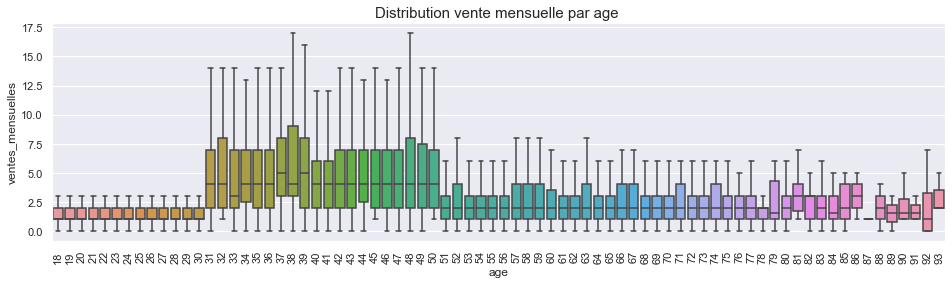

In [182]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_freq, y='ventes_mensuelles', x='age', showfliers=False)

plt.xticks(rotation=90)
plt.title("Distribution vente mensuelle par age ",fontsize=15)
plt.show()

In [183]:
r,p=stats.pearsonr(df_freq["age"], df_freq["ventes_mensuelles"])
print('p-value = ' ,p)
if p > .05:
    print('H0: Les variables sont indépendantes')
else:
    print('H1: Il y\'a une dépendance entre les variables')

p-value =  0.5068428647588795
H0: Les variables sont indépendantes


#### 3/ Le lien entre l'age et la taille du panier moyen (quantitative)

In [184]:
df_without_test["date_fixe"]=df_without_test['date'].dt.date 

In [185]:
df_panier=df_without_test.pivot_table(
    index=['client_id', 'date_fixe'],values='price',aggfunc='count').reset_index().pivot_table(
    index='client_id').reset_index().rename(
    columns={'price': 'taille_panier_moyen'})
df_panier=df_panier.merge(df_without_test[["client_id","classe_age","age"]].drop_duplicates(),on="client_id",how='left')
#df_panier



In [186]:
r,p=stats.pearsonr(df_panier["age"], df_panier["taille_panier_moyen"])
print('coef = %.3f\np-value = %.35f' % (r, p))
if p > .05:
    print('H0: Les variables sont indépendantes')
else:
    print('H1: Il y\'a une dépendance entre les variables')

coef = -0.175
p-value = 0.00000000000000000000000000000000000
H1: Il y'a une dépendance entre les variables


#### La taille du panier moyen suit la même logique :

#### * les moins de 30 ans comptent en moyenne moins de 2 livres par panier
#### * les 30-50 ans achètent 2 à 3 livres par commande
#### * les habitudes sont aléatoires chez les plus de 50 ans

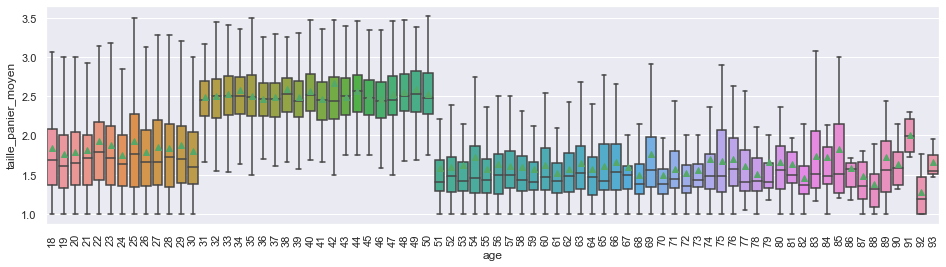

In [187]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_panier, 
            y='taille_panier_moyen', x='age', 
            showfliers=False, showmeans=True)
plt.xticks(rotation=90)
plt.show()

# Catégorie et age(qualitative/quantitative)
#### Catégorie et âge (ANOVA)
#### L'analyse de la variance est utile pour vérifier la corrélation entre une qualitative et une quantitative.

#### Avant de faire une ANOVA, on affiche la moyenne des âge dans chaque catégorie. La catégorie 2 se détache, mais les catégories 0 et 1 ont des moyennes assez proches : le test va permettre de vérifier si leur distance est significative.

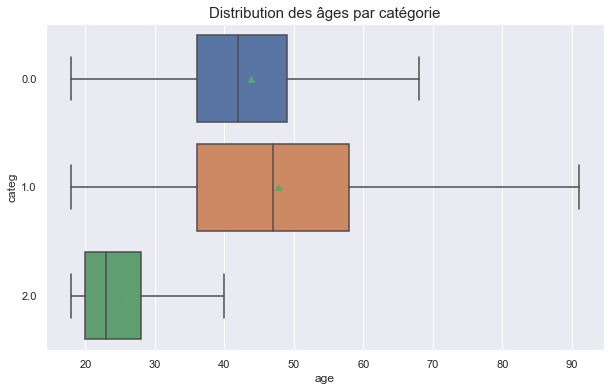

In [188]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_without_test, x='age', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title('Distribution des âges par catégorie',fontsize=15)
plt.show()

In [189]:
# Moyenne des prix par catégorie
df_without_test.groupby('categ').mean()['age']


categ
0.0    43.897616
1.0    47.651238
2.0    25.948031
Name: age, dtype: float64

In [190]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Test d'ANOVA
sample_df = df_without_test.sample(5000)
model = smf.ols('age ~ categ', data=sample_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p = anova_table['PR(>F)'][0]
print('ANOVA\np-value :', p, '\nstat (F) :', anova_table['F'][0])
if p > 0.05:
    print('H0: Les moyennes des echantillons sont égales.')
else:
    print('H1: Une ou plusieurs moyennes sont differentes.'
         '\n\nConditions :'
         '\n1. Normalité des résidus\n2. Homoscédasticité (si les variances sont egales )')

ANOVA
p-value : 2.253206208849204e-13 
stat (F) : 54.06630460096735
H1: Une ou plusieurs moyennes sont differentes.

Conditions :
1. Normalité des résidus
2. Homoscédasticité (si les variances sont egales )


#### Mais la distribution des résidus n'est pas normale.

Normalité des résidus (Shapiro)

p-value : 1.9424304761391634e-31
H0 rejetée : distribution probablement pas normale


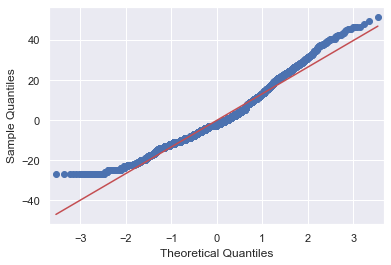

In [191]:
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import shapiro

# Test de Shapiro sur les résidus
print('Normalité des résidus (Shapiro)')
print('\np-value :', stats.shapiro(model.resid)[1])
if p>.05:
    print('H0 acceptée : distribution normale')
else:
    print('H0 rejetée : distribution probablement pas normale')
qqplot(model.resid, line='s')
plt.show()

#### Après un transformé boxcox les résidus sont considérés comme normaux : la première condition de l'ANOVA est remplie.

Normalité des résidus après boxcox :
stats : nan 
p-value : 1.0
H0 acceptée : distribution normale


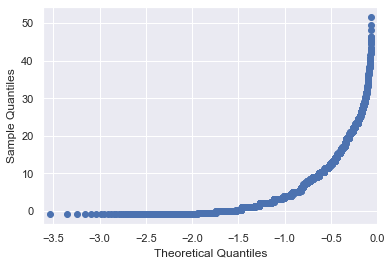

In [192]:
from scipy.special import boxcox1p
# Test de Shapiro sur les résidus après boxcox
residus = boxcox1p(model.resid, 1)
p = stats.shapiro(residus)[1]
print('Normalité des résidus après boxcox :'
    '\nstats :', stats.shapiro(residus)[0],
    '\np-value :', p)
if p>.05:
    print('H0 acceptée : distribution normale')
else:
    print('H0 rejetée : distribution probablement pas normale')
qqplot(residus, line='s')
plt.show()

#### Reste à tester l'homoscédasticité des résidus, pour s'assurer que les variances sont égales. Le test de Levene n'est pas concluant. Dans le cas où la condition d'homoscédasticité n'est pas remplie, on peut utiliser Welch ANOVA : ce test valide ici la corrélation entre l'age et catégorie.

In [193]:
# Test de Levene sur les 3 catégories
samples = 4000
a = df_without_test[df_without_test['categ']==0]['age'].sample(samples).values
b = df_without_test[df_without_test['categ']==1]['age'].sample(samples).values
c = df_without_test[df_without_test['categ']==2]['age'].sample(samples).values
stat, p = stats.levene(a, b, c)
print('Condition 2 : homoscédasticité (Levene)',
    '\nstats :', stat,
    '\np-value :', p)
if p > 0.05:
    print('H0: les variances sont égales')
else:
    print('H1: les variances ne sont pas égales (essayer Welch ANOVA)')


Condition 2 : homoscédasticité (Levene) 
stats : 705.14616105245 
p-value : 2.8965747990604627e-290
H1: les variances ne sont pas égales (essayer Welch ANOVA)



#### Qu'est-ce que l'ANOVA de Welch ?
#### L'ANOVA de Welch compare deux moyennes pour voir si elles sont égales. Il s'agit d'une alternative à l' ANOVA classique et peut être utilisée même si vos données violent l'hypothèse d' homogénéité des variances .

In [194]:
# Test de Welch entre variable  qualitative et quantitative

stat, p = stats.ttest_ind(sample_df['age'], sample_df['categ'])
print('Test de Welch (si absence d\'homoscédasticité)\n')
print('p-value :', p, '\nstat :', stat)
if p > 0.05:
    print('H0: les moyennes des échantillons sont égales')
else:
    print('H1: une ou plus des moyennes des échantillons sont inégales')

Test de Welch (si absence d'homoscédasticité)

p-value : 0.0 
stat : 230.17379053719353
H1: une ou plus des moyennes des échantillons sont inégales


### la categorie et l'age ont une correlation 

# Catégorie et sexe  (qualitative)--> Khi²
### Le test d'indépendance du χ² mesure la corrélation entre 2 variables qualitatives.

In [195]:
# Table de contingence
crosstab = pd.crosstab(df_without_test['categ'], df_without_test['sex'], margins=False)
print('Table de contingence :')
print(crosstab)
#import researchpy as rp


Table de contingence :
sex         f       m
categ                
0.0    206220  209460
1.0    114899  112270
2.0     17283   19200


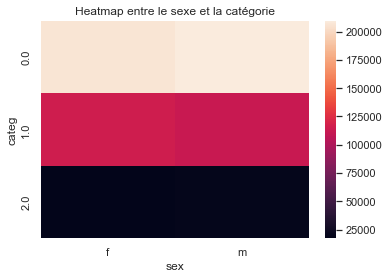

In [196]:
sns.heatmap(crosstab)
plt.title('Heatmap entre le sexe et la catégorie')
plt.show()

In [197]:
# Test de Chi 2
sample_df = df_without_test.sample(1500)
table = pd.crosstab(sample_df['categ'], sample_df['sex'], margins=False)
p = stats.chi2_contingency(table)[1]
print('Test de Chi 2 (2 variables catégorielles)')
print('p-value = %.35f' % ( p))
if p > .05:
    print('H0: Les deux observations sont indépendantes')
else:
    print('H1: il y a une dépendance entre les échantillons ')

Test de Chi 2 (2 variables catégorielles)
p-value = 0.59127502640245666043483652174472809
H0: Les deux observations sont indépendantes
